# Исследование данных о продажах компьютерных игр

Для интернет-магазина "Стримчик", который продает компьтерные игры по всему миру, нужно выявить закономерности, определяющие успешность игры. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.  
Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 

<a id='start'></a>
**План работы:**

**[1) Загрузка данных](#data)**  
- создать датафрейм на основе исходного файла с данными;  
- изучить общую информацию о полученном датафрейме, вывести на экран фрагмент.  

**[2) Предобработка данных](#preprocessing)**  
- заменить названия столбцов (привести к нижнему регистру);  
- преобразовать данные к нужному типу;  
- обработать пропуски, при необходимости;  
- проверка на наличие и обработка явных и неявных дубликатов;  
- посчитать в отдельный столбец суммарные продажи во всех регионах.

**[3) Исследовательский анализ данных](#researching)**  
- посмотреть, сколько игр выпускалось в разные годы; важны ли данные за все периоды?;  
- посмотреть, как менялись продажи по платформам; выбрать платформы с наибольшими суммарными продажами и построить распределение по годам; за какой характерный срок появляются новые и исчезают старые платформы?;  
- взять данные за соответствующий актуальный период; актуальный период определить самостоятельно в результате исследования предыдущих вопросов; основной фактор — эти данные помогут построить прогноз на 2017 год; данные за предыдущие годы в работе не учитывать;  
- определить, какие платформы лидируют по продажам, растут или падают?; выбрать несколько потенциально прибыльных платформ;  
- построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам, описать результат;  
- посмотреть, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков; построить диаграмму рассеяния и посчитать корреляцию между отзывами и продажами; сформулировать выводы;  
- соотнести выводы с продажами игр на других платформах;  
- посмотреть на общее распределение игр по жанрам; что можно сказать о самых прибыльных жанрах?; выделяются ли жанры с высокими и низкими продажами?

**[4) Составление портрета пользователя каждого региона](#portraits)**  
Определить для пользователя каждого региона (NA, EU, JP):  
- самые популярные платформы (топ-5); описать различия в долях продаж;  
- самые популярные жанры (топ-5); пояснить разницу;  
- влияет ли рейтинг ESRB на продажи в отдельном регионе?  

**[5) Проверка гипотез](#hypothesis)**  
- средние пользовательские рейтинги платформ Xbox One и PC одинаковые;  
- средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.  
Задать самостоятельно пороговое значение alpha. Пояснить:  
- формулировку нулевой и альтернативной гипотезы;  
- применение критерия для проверки гипотез.

**[6) Общий вывод](#summary)**

---

<a id='data'></a>
### Загрузка данных  
[к заголовку](#start)

#### Подключение библиотек

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import seaborn

#### Загрузка датасета, изучение общей информации

In [2]:
games = pd.read_csv('datasets/games.csv')
games.info()
display(games.head(20))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


#### Описание столбцов

**Name** — название игры  
**Platform** — платформа  
**Year_of_Release** — год выпуска  
**Genre** — жанр игры  
**NA_sales** — продажи в Северной Америке (миллионы проданных копий)  
**EU_sales** — продажи в Европе (миллионы проданных копий)  
**JP_sales** — продажи в Японии (миллионы проданных копий)  
**Other_sales** — продажи в других странах (миллионы проданных копий)  
**Critic_Score** — оценка критиков (максимум 100)  
**User_Score** — оценка пользователей (максимум 10)  
**Rating** — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

#### Наблюдения по таблице

Меньше половины столбцов, 5 из 11, не имеет пропущенных значений.  
Названия столбцов нужно будет привести к одному стилю - все буквы в нижнем регистре, слова через подчеркивание.  
Столбец с годом выпуска игры имеет тип float, нужно поменять на int.  
Столбец рейтингом пользователей имеет тип object, нужно перевести в float.

<a id='preprocessing'></a>
### Предобработка данных  
[к заголовку](#start)

#### Замена названий столбцов

In [3]:
games.columns = games.columns.str.lower()
print(list(games))

['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating']


#### Преобразование типов данных

Столбцы 'year_of_release' и 'user_score' имеют избыточный тип данных. Год обозначается целым числом и не требует типа float. Оценка пользователя это число от 0 до 10, необязательно целое, но не требующее для своего описания типа object.

In [4]:
games['year_of_release'] = games['year_of_release'].astype('Int64')

В столбце 'user_score' помимо числовых значений рейтинга и пропусков встречается значение "tbd", что должно, видимо, обозначать "определить; будет определено" (от англ. "To Be Determined"). Такие значения на момент выполнения данной работы можно приравнять к пропущенным.

In [5]:
games['user_score'] = games['user_score'].replace('tbd',np.NaN)
games['user_score'] = games['user_score'].astype(float)

In [6]:
#проверка
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


Названия столбцов записаны в едином стиле, типы данных соответствуют значениям.

#### Обработка пропусков

##### Столбец `name`

Начнем с первого столбца. Есть две игры без названия:

In [7]:
display(games.query('name.isna()'))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Удалим эти строки, т.к. непонятно, каким образом учитывать эти игры в анализе - без названия, жанра и рейтингов.

In [8]:
games = games.dropna(subset=['name'],axis=0)

Возможная причина появления таких пропусков - техническая ошибка при вводе или транспортации данных.

##### Столбец `year_of_release`

In [9]:
display(games.query('year_of_release.isna()'))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,<NA>,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,<NA>,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,<NA>,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,<NA>,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,<NA>,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,<NA>,Sports,0.01,0.00,0.00,0.00,43.0,NaN,E10+
16405,Freaky Flyers,GC,<NA>,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,<NA>,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,<NA>,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Строк с пропусками мало, меньше 2%. Разброс по годам, судя по разнообразию платформ, большой. При отсутствии этих данных в статистике искажение результата будет мизерным, но если заполнить каким-то одним годом, то искажение может очень сильно повлиять на результат.

Оставляем без заполнения. При надобности, можно будет заполнить медианным годом для соответствующей платформы или провести по каждой игре дополнительный поиск информации в Интернете. 

Возможные причины появления пропусков в этом столбце - ошибки при вводе и/или транспортации данных, отсутствие информации в свободном доступе по причине устаревания, или ошибки в автоматизированном сборе данных.

##### Столбец `critic_score`

In [10]:
display(games.query('critic_score.isna()'))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Игр без оценок - больше половины списка. Оставляем без заполнения.

##### Столбец `user_score`

Аналогично предыдущему пункту, оставляем пропуски без заполнения.

Значения "tbd" были заменены на NaN в пункте 2.2.

Возможные причины появления пропусков в этом и предыдущем столбцах - ошибки при вводе и/или транспортации данных, отсутствие информации в свободном доступе по причине устаревания, или ошибки в автоматизированном сборе данных.

##### Столбец `rating`

In [11]:
games['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Заметим, что в значениях присутствуют два равнозначных рейтинга: "E" и "К-А", устаревший на данный момент. При необходимости, "К-А" нужно будет перевести в "Е".  

Аналогично предыдущему пункту, оставляем пропуски без заполнения.

Возможные причины появления пропусков в этом столбце - ошибки при вводе и/или транспортации данных, отсутствии информации в свободном доступе по причине устаревания, или ошибки в автоматизированном сборе данных. Также, некоторые игры появились до появления ESRB и не получили их рейтинга.

#### Проверка наличия дубликатов

##### Явные дубликаты:

In [12]:
games.duplicated().sum()

0

В датасете нет повторяющихся строк.

##### Неявные дубликаты

In [13]:
games.duplicated(['name','year_of_release','platform']).sum()

1

Нашлась одна строка. Узнаем, что это за строка:

In [14]:
games[games.duplicated(['name','year_of_release','platform'])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16230,Madden NFL 13,PS3,2012,Sports,0.0,0.01,0.0,0.0,83.0,5.5,E


Посмотрим на обе строки:

In [15]:
games.query('name == "Madden NFL 13" and platform == "PS3"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


Отличие только в продажах. Добавим значение eu_sales второй строки к первой:

In [16]:
games.loc[[604],['eu_sales']] = 0.23
#проверка:
games.loc[[604]]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012,Sports,2.11,0.23,0.0,0.23,83.0,5.5,E


Удалим вторую строку:

In [17]:
games = games.query('~(name == "Madden NFL 13" and na_sales == 0)')
#проверка:
games.query('name == "Madden NFL 13" and platform == "PS3"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012,Sports,2.11,0.23,0.0,0.23,83.0,5.5,E


Мы избавились и от неявных дубликатов.

#### Подсчет суммарных продаж

In [18]:
#создадим столбец 'sales_sum' и впишем туда суммарные значения продаж игр по всем регионам:
games['sales_sum'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
#проверка
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_sum
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


In [19]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16712 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16712 non-null  object 
 1   platform         16712 non-null  object 
 2   year_of_release  16443 non-null  Int64  
 3   genre            16712 non-null  object 
 4   na_sales         16712 non-null  float64
 5   eu_sales         16712 non-null  float64
 6   jp_sales         16712 non-null  float64
 7   other_sales      16712 non-null  float64
 8   critic_score     8136 non-null   float64
 9   user_score       7589 non-null   float64
 10  rating           9948 non-null   object 
 11  sales_sum        16712 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.7+ MB


#### Итоги этапа

На этапе предолбработки были произведены следующие действия:

- Названия столбцов приведены к "змеиному" стилю - строчные буквы с разделителем "нижнее подчеркивание";
- Преобразованы типы данных в столбцах `year_of_release` и `user_score`;
- Обработаны пропущенные значения;
- Устранены неявные дубликаты.

<a id='researching'></a>
### Исследовательский анализ
[к заголовку](#start)

#### Исследование количества выпуска игр в зависимости от года

In [21]:
games_per_year = games.groupby(by='year_of_release')['name'].count()
print(games_per_year)

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     652
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64


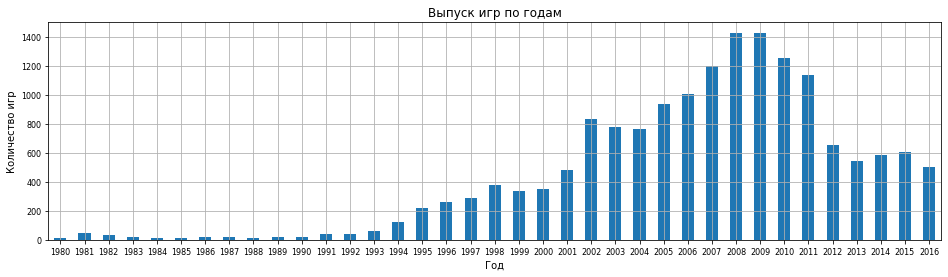

In [22]:
games_per_year.plot(kind='bar',
                    title='Выпуск игр по годам',
                    grid=True,
                    figsize=(16,4),
                    fontsize=8,
                    rot=0,
                    legend=False
              )
plt.xlabel('Год')
plt.ylabel('Количество игр');

На графике ясно виден рост количества новых игр в конце 90-х после относительно спокойного периода 80-х, "золотой век" с 2006-го по 2011-й, и падение до половинного уровня в 2012-м. Связана такая форма графика скорее всего с тем, как проходила эволюция пользовательских вычислительных и, в частности также, игровых систем. 

Важны ли нам данные за все года? Очевидно, нет. Для оценки успешности той или иной новой игры мы должны учитывать статистику по современным платформам и вкусовые предпочтения современных пользователей.

#### Исследование продаж по игровым платформам

Исследуем, как менялись продажи по платформам. 

In [23]:
platform_sales = games.groupby('platform')['sales_sum'].sum().sort_values()
platform_sales

platform
PCFX       0.03
GG         0.04
3DO        0.10
TG16       0.16
WS         1.42
NG         1.44
SCD        1.86
DC        15.95
GEN       28.35
SAT       33.59
PSV       54.07
WiiU      82.19
2600      96.98
XOne     159.32
GC       198.93
SNES     200.04
N64      218.68
NES      251.05
GB       255.46
XB       257.74
3DS      259.00
PC       259.52
PSP      294.05
PS4      314.14
GBA      317.85
PS       730.86
DS       806.12
Wii      907.51
PS3      939.65
X360     971.42
PS2     1255.77
Name: sales_sum, dtype: float64

Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. 

In [24]:
#возьмем десять последних в списке платформ:
top_platforms = ["PS","DS","Wii","PS3","X360","PS2","PS4","GBA","PSP","PC"]

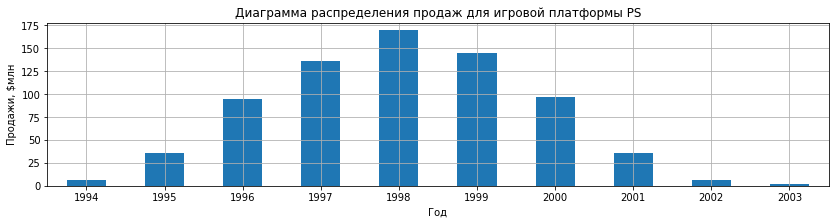

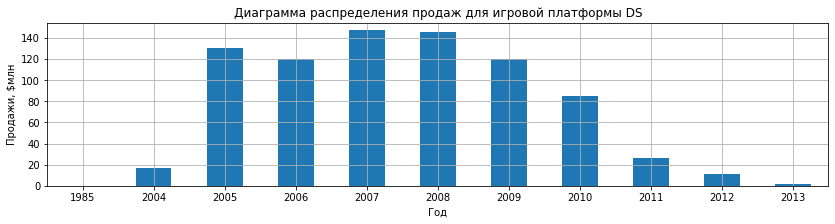

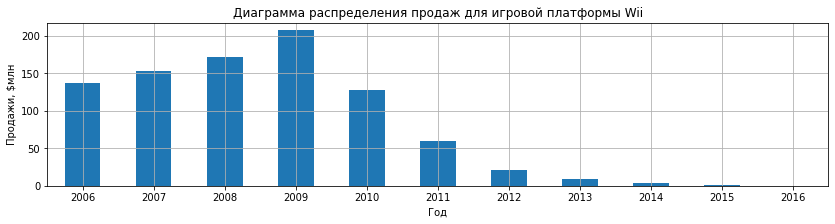

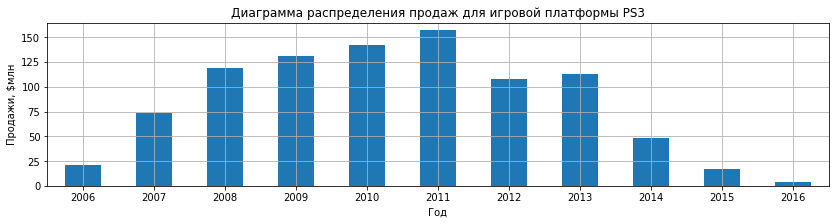

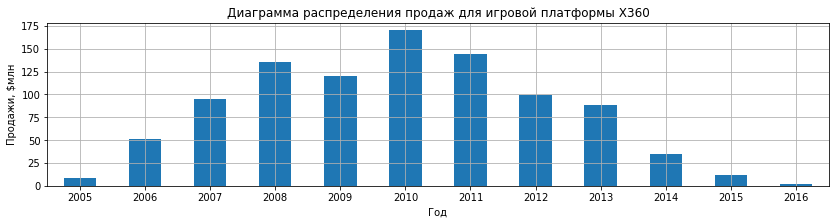

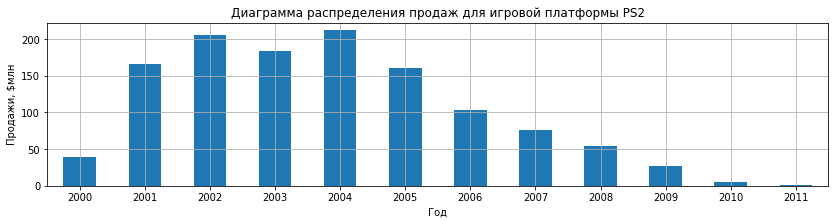

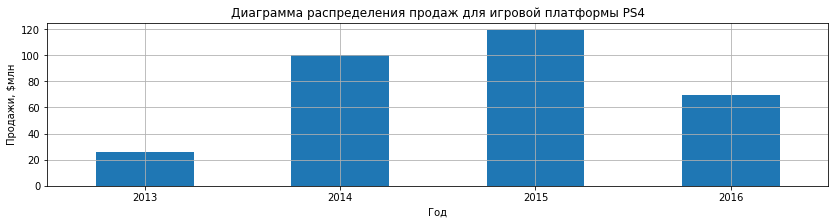

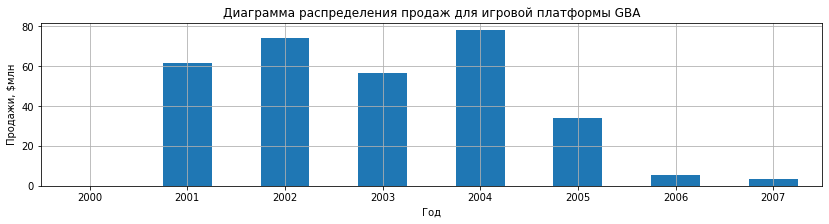

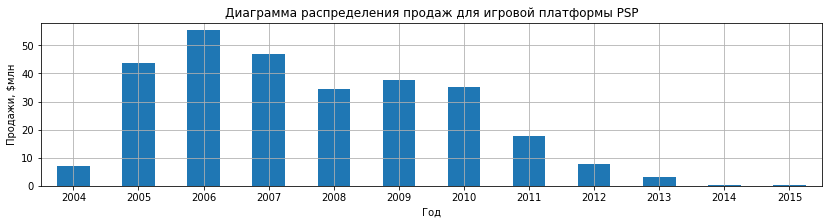

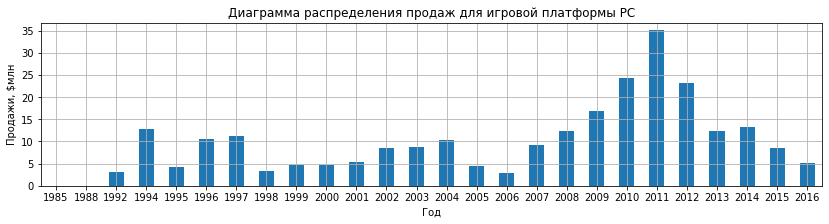

In [26]:
#выведем на экран распределение по годам:
for item in top_platforms:
    platform_sales = games.query('platform == @item').groupby('year_of_release')['sales_sum'].sum()
    title = 'Диаграмма распределения продаж для игровой платформы ' + item
    platform_sales.plot(kind='bar'
                        ,rot=0
                        ,title=title
                        ,grid=True
                        ,figsize=(14,3)
                        ,fontsize=10
                       )
    plt.xlabel('Год')
    plt.ylabel('Продажи, $млн');
    plt.show()

Для каждой платформы период "жизни", т.е. весь срок, за который происходили взлет и падение, примерно одинаков - от 8 до 12 лет*. Связано это, видимо, опять же, с постепенным устареванием платформы, ограничивающим возможности для производства более новых и более требовательных к оборудованию игр. 

Этим объясняется и нехарактерный график для платформы PC, персональных компьютеров. Собственно, это и не платформа вовсе, а совокупность разнообразных модификаций вычислительных систем с большим диапазоном возможностей, постоянным обновлением элементной базы и программного обеспечения. Поэтому график тянется от 1985 по 2016.

Платформа PS4 появилась относительно недавно, и, скорее всего, находится на пике продаж - меньший показатель в 2016, чем в 2015, обусловлен, видимо, неполнотой данных по 2016-му году.



**Год "1985" для платформы DS, скорее всего, является ошибкой ввода данных, т.к. после проверки выясняется, что эта платформа появилась только в 2004-м году.*

Проверим, через какой период времени появляются новые платформы:

In [28]:
platform_born_period = (games
                        .pivot_table(index='platform'
                                     ,values='year_of_release'
                                     ,aggfunc='min')
                        .sort_values(by='year_of_release')
                       )
platform_born_period

,year_of_release
platform,
2600,1980
NES,1983
DS,1985
PC,1985
GB,1988
SNES,1990
GEN,1990
GG,1992
SCD,1993


Новые платформы появляются нерегулярно: могут появится несколько новых в один год, или только через пять лет. Но если брать развитие какой-то определенной платформы, например PS (Sony PlayStation), то можно увидеть, что период смены поколений равен в среднем 6 годам, т.е. половине среднего периода жизни платформы. Так PS появилась в 1994 году, PS2 - в 2000, PS3 - в 2006, PS4 - в 2013.

#### Определение актуального периода

Основной фактор для определения актуального периода - эти данные должны помочь нам построить прогноз на 2017 год. 

Зададим актуальный период, исходя из графика в пункте 3.1, равный последнему относительно "плоскому" временному отрезку: с 2012 по 2016 годы. Зная средний период "жизни" платформы, за пять лет актуального периода, мы можем оценить, на каком этапе находится та или иная платформа, что у нее впереди.

In [29]:
actual = [2012,2013,2014,2015,2016]

In [30]:
#получим новый датасет только за актуальный период:
games_actual = games.query('year_of_release in @actual')
games_actual.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2885 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2885 non-null   object 
 1   platform         2885 non-null   object 
 2   year_of_release  2885 non-null   Int64  
 3   genre            2885 non-null   object 
 4   na_sales         2885 non-null   float64
 5   eu_sales         2885 non-null   float64
 6   jp_sales         2885 non-null   float64
 7   other_sales      2885 non-null   float64
 8   critic_score     1311 non-null   float64
 9   user_score       1530 non-null   float64
 10  rating           1610 non-null   object 
 11  sales_sum        2885 non-null   float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 295.8+ KB


#### Определение потенциально прибыльных платформ

Посмотрим, у каких платформ продажи растут или падают.

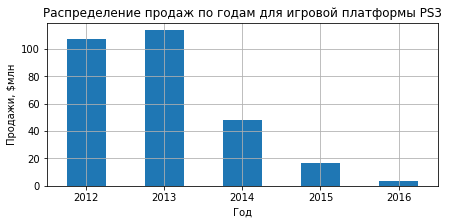

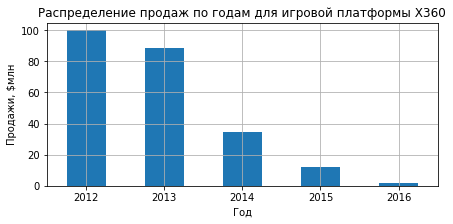

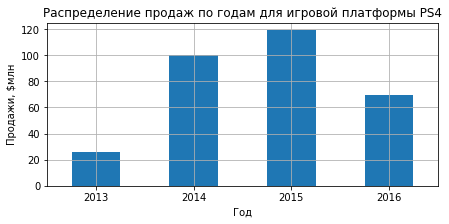

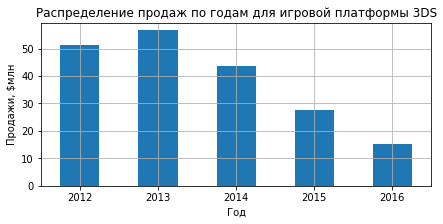

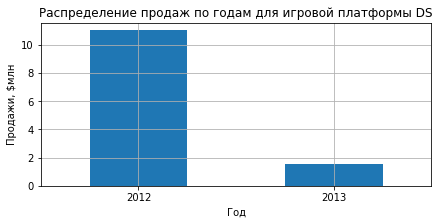

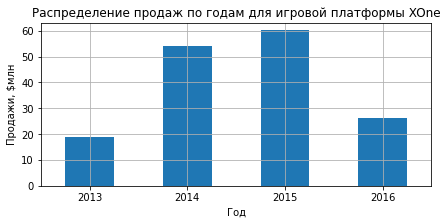

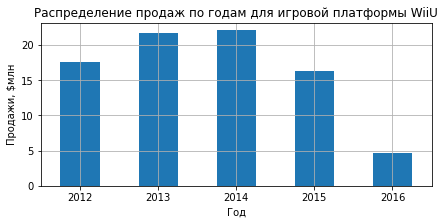

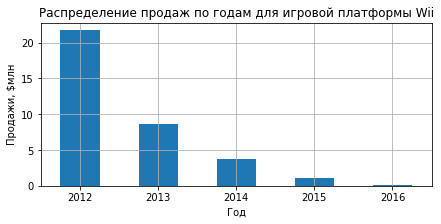

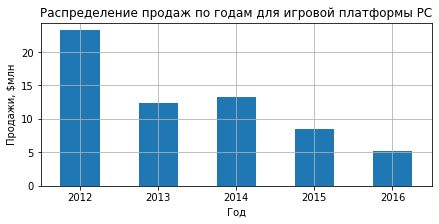

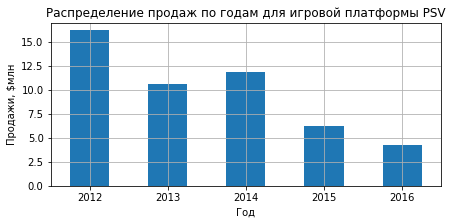

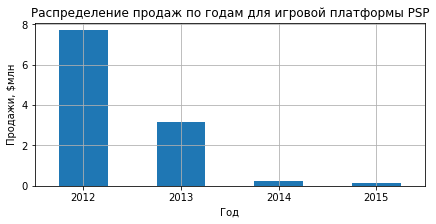

In [31]:
#список платформ, представленных в актуальном периоде:
platforms_actual = games_actual['platform'].unique()
#гистограммы продаж по годам для каждой платформы в актуальном периоде:
for item in platforms_actual:
    platform_sales = games_actual.query('platform == @item').groupby('year_of_release')['sales_sum'].sum()
    title = 'Распределение продаж по годам для игровой платформы ' + item
    platform_sales.plot(kind='bar'
                        ,rot=0
                        ,title=title
                        ,grid=True
                        ,figsize=(7,3)
                        ,fontsize=10
                       )
    plt.xlabel('Год')
    plt.ylabel('Продажи, $млн');
    plt.show()

Имея в виду, что данные за 2016 год могут быть неполными, подытожим:

- PS3: график снижается, уже на излете - не перспективная платформа; 
- X360: график снижается, уже на излете - не перспективная платформа;
- PS4: появилась три года назад, график еще не на пике - перспективная платформа;
- 3DS: график снижается - не перспективная платформа;
- DS: последняя игра вышла три года назад - платформа устарела;
- XOne: появилась три года назад, график еще не на пике - перспективная платформа;
- WiiU: график уже прошел пик, года два-четыре платформа еще проживет - условно перспективная платформа;
- Wii: продажи почти закончились - не перспективная платформа;
- PC: особенная группа, последние четыре года продажи колеблются около 10 млн - перспективная платформа;
- PSV: продажи падают - не перспективная платформа;
- PSP: график снижается, уже на излете - не перспективная платформа.

Итак, потенциально прибыльными платформами являются:

- PS4;
- XOne;
- PC.

#### Построение "ящика с усами" по глобальным продажам

Построим "ящики с усами" для разных игровых платформ:

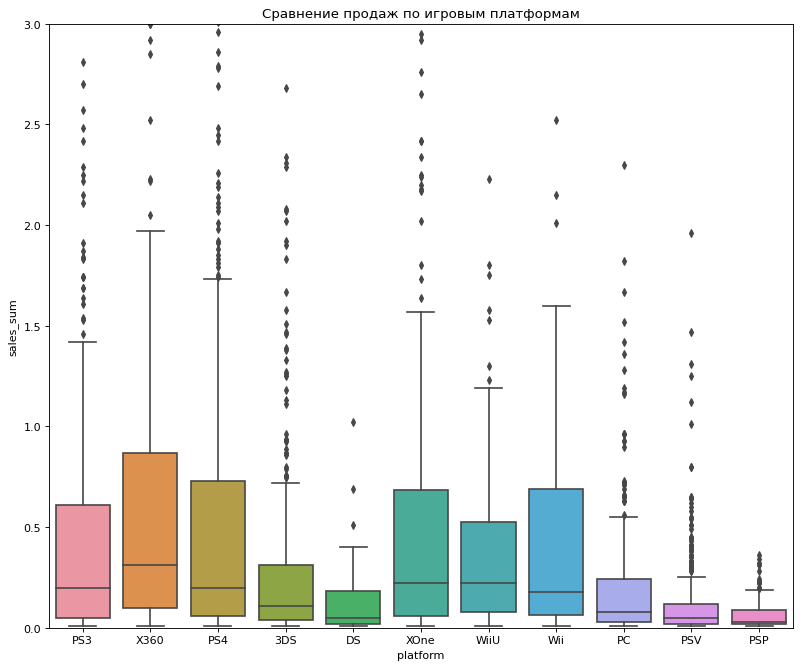

In [32]:
plt.figure(figsize=(12,10), dpi=80)
seaborn.boxplot(data=games_actual, x='platform',y='sales_sum').set(title='Сравнение продаж по игровым платформам')
plt.ylim(0, 3);

На сравнительном графике видно, сколько, предположительно, могут заработать игры для той или иной игровой платформы. Сам "ящик" это 50% игр, и мы видим, что и медиана, и "тело ящика" выше у платформы Х360. В пункте 3.2 мы выяснили, что эта платформа прошла полный жизненный путь, т.е. новые игры для нее скорее всего не будут актуальны и не принесут много денег.

Вторая по продажам - платформа PS4. Это одна из платформ, определенных нами как перспективные. Она недавно появилась, но уже догоняет по продажам Х360.

Третья по продажам и вторая по перспективности - это ХOne, преемница X360.

Заметим, что платформы новые, поэтому игры, упомянутые в датасете, возможно, еще не успели заработать все, что могли, а, значит, "ящик" для этих двух платформ поднимется еще выше. 

Еще одна, выделенная нами перспективная платформа - PC, не имеет таких больших продаж, как две предыдущие, но зато не прекратит свое существование в ближайшем будущем, как игровые консоли.

#### Исследование влияния отзывов пользователей и критиков на продажи

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. 

В качестве исследуемой выберем набирающую популярность платформу PS4:

Коррелляция между: "Оценки критиков", "Суммарные продажи" = 0.40656790206178095


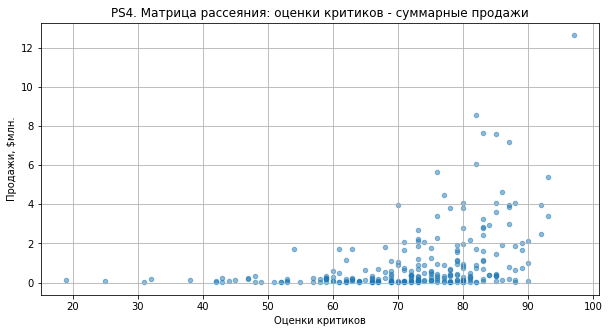

In [33]:
#корреляция продаж с оценками критиков
games_actual.query('platform == "PS4"').plot(title='PS4. Матрица рассеяния: оценки критиков - суммарные продажи'
                                             ,x='critic_score'
                                             ,y='sales_sum'
                                             ,kind='scatter'
                                             ,alpha=0.5
                                             ,figsize=[10,5]
                                             ,grid=True
                                            )
plt.xlabel('Оценки критиков')
plt.ylabel('Продажи, $млн.');

print('Коррелляция между: "Оценки критиков", "Суммарные продажи" =',
      games_actual.query('platform == "PS4"')['critic_score']
      .corr(games_actual.query('platform == "PS4"')['sales_sum'])
     )

Коррелляция между: "Оценки пользователей", "Суммарные продажи" = -0.031957110204556376


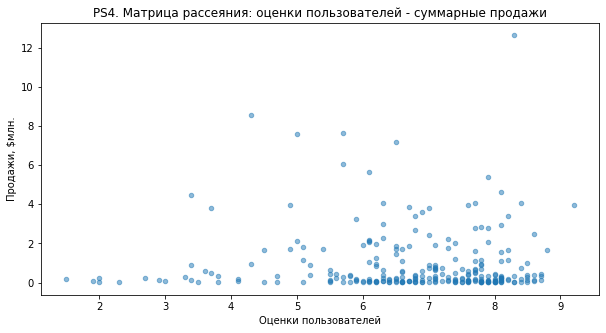

In [34]:
#корреляция продаж с оценками пользователей
games_actual.query('platform == "PS4"').plot(title='PS4. Матрица рассеяния: оценки пользователей - суммарные продажи'
                                             ,x='user_score'
                                             ,y='sales_sum'
                                             ,kind='scatter'
                                             ,alpha=0.5
                                             ,figsize=[10,5]
                                            )
plt.xlabel('Оценки пользователей')
plt.ylabel('Продажи, $млн.');

print('Коррелляция между: "Оценки пользователей", "Суммарные продажи" =',
      games_actual.query('platform == "PS4"')['user_score']
      .corr(games_actual.query('platform == "PS4"')['sales_sum'])
     )

Сформулируем выводы.

Диаграммы рассеяния и коэффициэнты корреляции показывают, что пользователи склонны доверять критикам, а не другим пользователям. Вероятность того, что игра с большой оценкой критиков будет хорошо продаваться, больше, чем вероятность хороших продаж с большой пользовательской оценкой.

Сравним с другими платформами - PC, XOne, PS3, X360 и WiiU:

Коррелляция между: Оценки критиков, "Суммарные продажи" = 0.23724324311567915


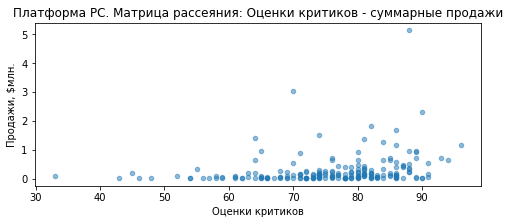

Коррелляция между: Оценки пользователей, "Суммарные продажи" = -0.12186747630735577


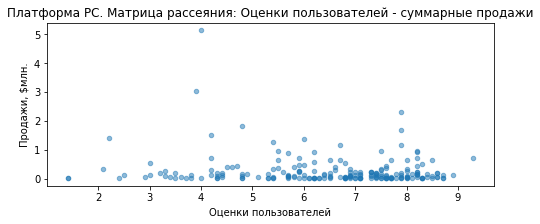

Коррелляция между: Оценки критиков, "Суммарные продажи" = 0.4169983280084017


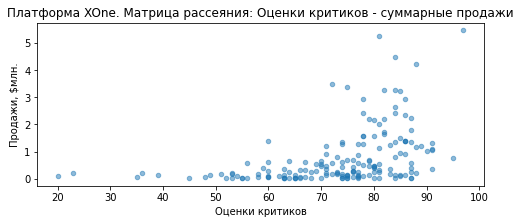

Коррелляция между: Оценки пользователей, "Суммарные продажи" = -0.06892505328279414


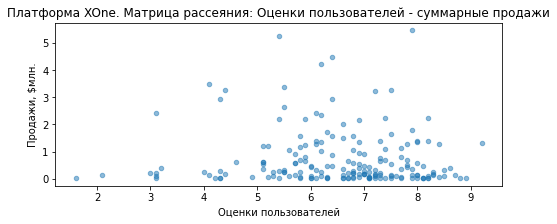

Коррелляция между: Оценки критиков, "Суммарные продажи" = 0.33416558787023765


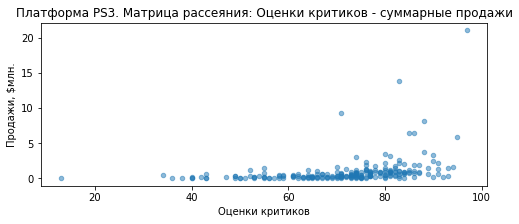

Коррелляция между: Оценки пользователей, "Суммарные продажи" = -0.006217851960559279


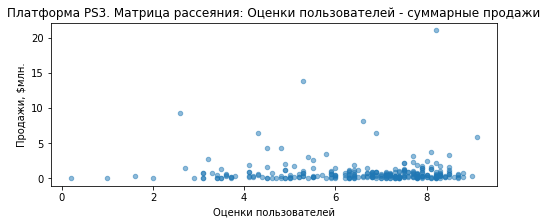

Коррелляция между: Оценки критиков, "Суммарные продажи" = 0.3605734888507336


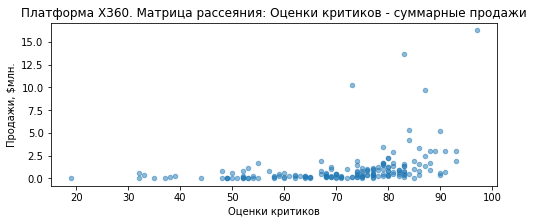

Коррелляция между: Оценки пользователей, "Суммарные продажи" = 0.006163978646213326


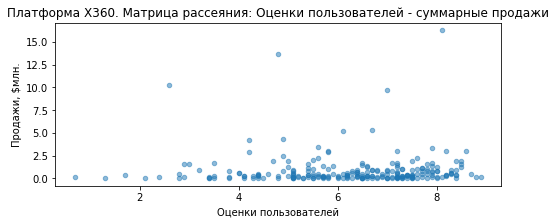

Коррелляция между: Оценки критиков, "Суммарные продажи" = 0.34837976012017485


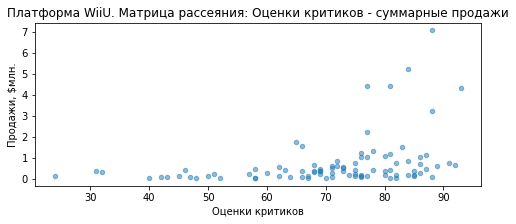

Коррелляция между: Оценки пользователей, "Суммарные продажи" = 0.4002190202148617


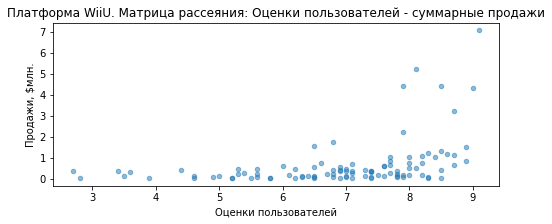

In [35]:
for pl in ['PC','XOne','PS3','X360','WiiU']:
    for score in ['critic_score','user_score']:
        if score == 'critic_score':
            sc = 'Оценки критиков'
        else:
            sc = 'Оценки пользователей'
        (games_actual
         .query('platform == @pl')
         .plot(title=('Платформа '+pl+'. Матрица рассеяния: '+sc+' - суммарные продажи')
               ,x=score
               ,y='sales_sum'
               ,kind='scatter'
               ,alpha=0.5
               ,figsize=[8,3]
              )
        )
        plt.xlabel(sc)
        plt.ylabel('Продажи, $млн.');
        
        print('Коррелляция между: '+sc+', "Суммарные продажи" =',
              games_actual.query('platform == @pl')[score]
              .corr(games_actual.query('platform == @pl')['sales_sum'])
             )
        plt.show()

По всем платформам примерно одинаковая картина. Причем, для нескольких платформ, в случае пользовательской оценки, корреляция даже отрицательная. Т.е. игры, имеющие успех у пользователей, не всегда будут хорошо продаваться. Единственной платформой из рассмотренных, где отзывы пользователей положительно и сильно коррелируют с продажами, выступает WiiU.

#### Исследование распределения игр по жанрам

##### Посмотрим, какие бывают жанры у компьютерных игр и сколько игр они объединяют:

In [36]:
genre_distr = games_actual['genre'].value_counts()
genre_distr

Action          1031
Role-Playing     370
Adventure        302
Sports           267
Shooter          235
Misc             192
Racing           115
Fighting         109
Platform          85
Simulation        80
Strategy          71
Puzzle            28
Name: genre, dtype: int64

Построим круговую диаграмму для визуализации этих данных:

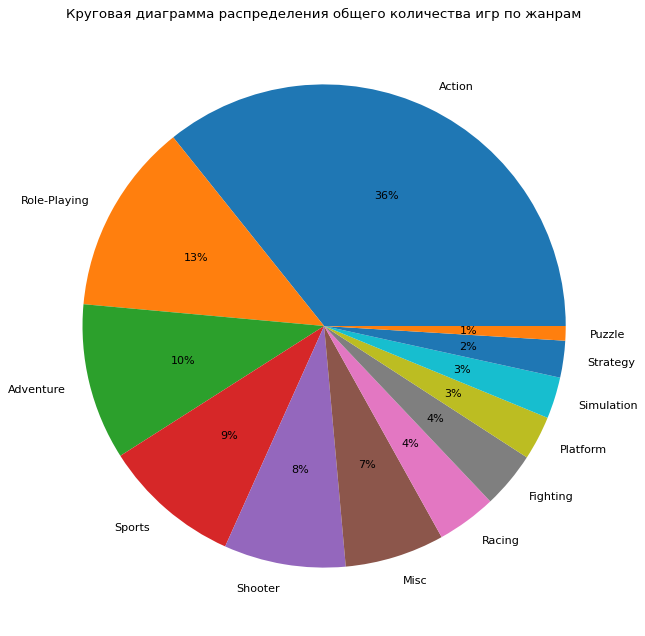

In [37]:
plt.figure(figsize=(10,10), dpi=80)
plt.title('Круговая диаграмма распределения общего количества игр по жанрам')
plt.pie(genre_distr, labels=genre_distr.index, autopct='%.0f%%');

Более трети от всех игр составляют игры жанра action. Жанры role-playing, adventure и sports делят примерно поровну вторую треть. А последнюю треть составляют игры восьми жанров.

Пятерка топовых жанров по разнообразию игр выглядит так:
- Action
- Role-Playing
- Adventure
- Sports
- Shooter

##### Исследуем, какие жанры самые прибыльные

In [38]:
#выведем список жанров с абсолютными, средними и медианными продажами:
genre_sales = (games_actual
               .pivot_table(index='genre'
                            ,values='sales_sum'
                            ,aggfunc=['sum','mean','median']
                           )
              )
print('\nАбсолютные, средние и медианные продажи по жанрам:')
genre_sales


Абсолютные, средние и медианные продажи по жанрам:


,sum,mean,median
,sales_sum,sales_sum,sales_sum
genre,,,
Action,441.12,0.427856,0.120
Adventure,29.43,0.097450,0.030
Fighting,44.49,0.408165,0.130
Misc,85.04,0.442917,0.120
Platform,61.00,0.717647,0.210
Puzzle,4.89,0.174643,0.045
Racing,53.50,0.465217,0.140
Role-Playing,192.80,0.521081,0.140


Для наглядности построим круговую диаграмму для распределения общей суммы продаж по жанрам:

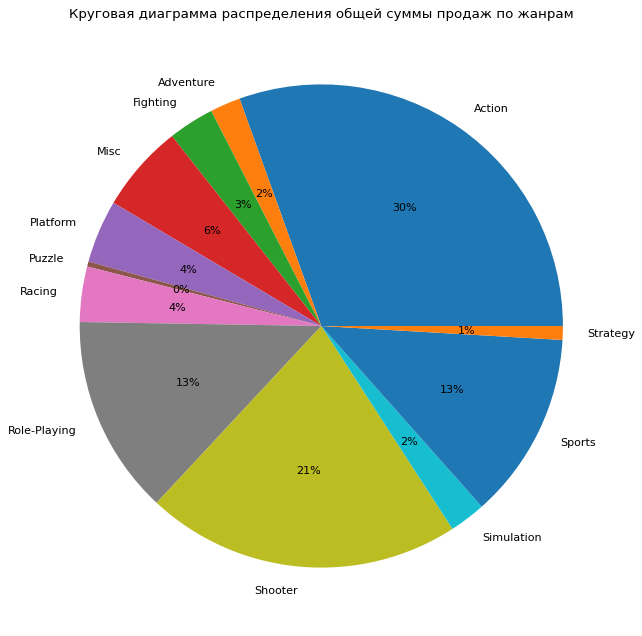

In [39]:
plt.figure(figsize=(10,10), dpi=80)
plt.title('Круговая диаграмма распределения общей суммы продаж по жанрам')
plt.pie(genre_sales[(   'sum', 'sales_sum')], labels=genre_sales.index, autopct='%.0f%%');

Пятерка топовых жанров по общим продажам:
- Action
- Shooter
- Role-Playing
- Sports
- Misc(miscellaneous - "разнообразные")

Построим график распределения средней суммы продаж по жанрам:

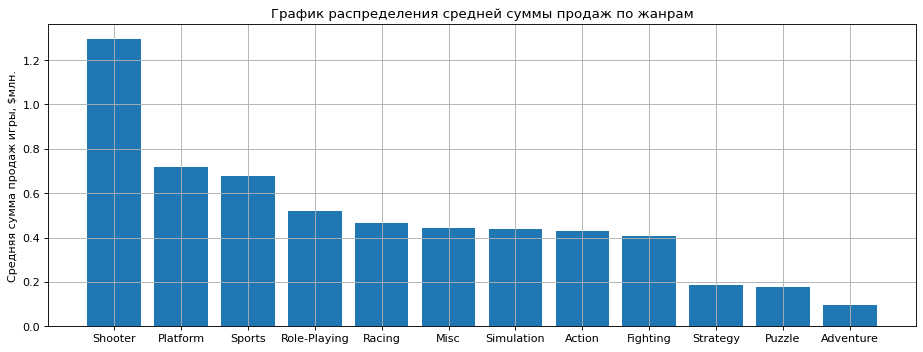

In [40]:
genre_sales = genre_sales.sort_values((  'mean', 'sales_sum'),ascending=False)

plt.figure(figsize=(14,5), dpi=80)
plt.title('График распределения средней суммы продаж по жанрам')
plt.grid()
plt.bar(height=genre_sales[(  'mean', 'sales_sum')], x=genre_sales.index)
plt.ylabel('Средняя сумма продаж игры, $млн.');

Топ-5 жанров по средним продажам:
- Shooter
- Platform
- Sports
- Role-Playing
- Racing

Построим график распределения медианной суммы продаж по жанрам:

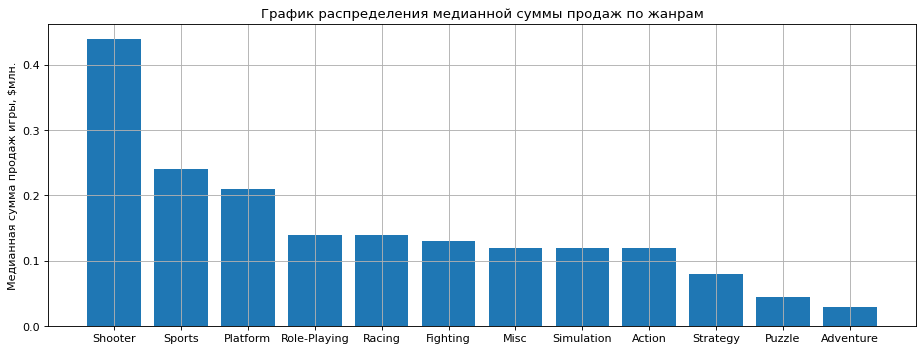

In [41]:
genre_sales = genre_sales.sort_values(('median', 'sales_sum'),ascending=False)

plt.figure(figsize=(14,5), dpi=80)
plt.title('График распределения медианной суммы продаж по жанрам')
plt.grid()
plt.bar(height=genre_sales[('median', 'sales_sum')], x=genre_sales.index)
plt.ylabel('Медианная сумма продаж игры, $млн.');

Топ-5 жанров по медианным продажам:
- Shooter
- Sports
- Platform
- Role-Playing
- Racing

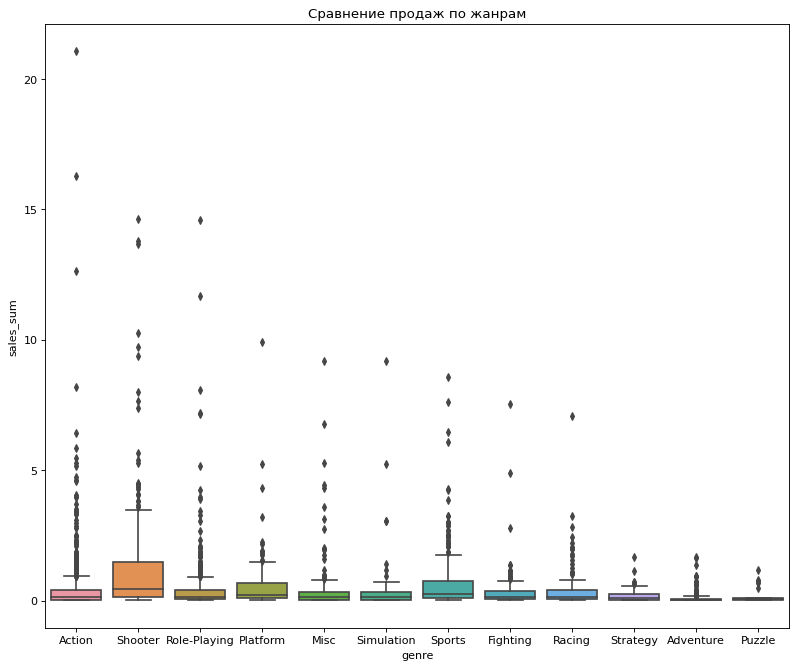

In [42]:
plt.figure(figsize=(12,10), dpi=80)
seaborn.boxplot(data=games_actual, x='genre',y='sales_sum').set(title='Сравнение продаж по жанрам');

При разработке новой игры стоит обратить внимание на топовые жанры из двух последних графиков. Согласно анализу, игры этих жанров в среднем и вероятнее всего будут продаваться хорошо.

Игры в жанре "Shooter", "стрелялки", продаются в среднем в два раза лучше ближайшего конкурента. К тому же, доля таких игр в общем разнообразии невелика, всего 8%.

<a id='portraits'></a>
### Составление портрета пользователя для каждого региона  
[к заголовку](#start)

Анализ проведем для пользователей регионов Северная Америка, Европа и Япония (NA, EU, JP).

#### Определение самых популярных платформ

Найдем для каждого региона самые популярные платформы (топ-5).

In [43]:
#создадим ф-ию нахождения пяти платформ с максимальными продажами:
def pltf_topfive(col):
    return (games_actual
                    .pivot_table(index='platform'
                                 ,values=col
                                 ,aggfunc='sum'
                                )
            .sort_values(col,ascending=False)
            .head()
           )

#применим для каждого региона и выведем на экран:
for col in ['na_sales','eu_sales','jp_sales']:
    print('____________________________________\n')
    print(f'Топ-5 игровых платформ в регионе {col.split("_")[0].upper()}:')
    print(pltf_topfive(col))

____________________________________

Топ-5 игровых платформ в регионе NA:
          na_sales
platform          
X360        140.05
PS4         108.74
PS3         103.38
XOne         93.12
3DS          55.31
____________________________________

Топ-5 игровых платформ в регионе EU:
          eu_sales
platform          
PS4         141.09
PS3         106.86
X360         74.52
XOne         51.59
3DS          42.64
____________________________________

Топ-5 игровых платформ в регионе JP:
          jp_sales
platform          
3DS          87.79
PS3          35.29
PSV          21.04
PS4          15.96
WiiU         13.01


В 2016 году в Японии, по данным Википедии, проживало 127 млн. чел., в Европе - 420, в США с Канадой - 360. Этим объясняется, что общие суммы продаж по Японии ниже, чем по Европе и Северной Америке.

X360 - это консоль от фирмы Майкрософт, США. Возможно, этим объясняется, что в странах Северной Америки она занимает первое место по продажам и не представлена в пятерке для Японии, где весь топ-5 - местные консоли. 

Майкрософтовская XOne присутствует и в американской, и в европейской пятерке, в японской ее нет. Зато в японской есть две местных плалтформы WiiU и PSV, которых нет в американской и европейской.

С точки зрения прибыльности новой игры наиболее предпочтительной платформой является PS4.

#### Определение самых популярных жанров

Найдем для кождого региона самые популярные жанры (топ-5).

In [44]:
#создадим ф-ию нахождения пяти наиболее популярных жанров:
def genre_topfive(col):
    return (games_actual
                    .pivot_table(index='genre'
                                 ,values=col
                                 ,aggfunc='sum'
                                )
            .sort_values(col,ascending=False)
            .head()
           )

#применим для каждого региона и выведем на экран:
for col in ['na_sales','eu_sales','jp_sales']:
    print('____________________________________\n')
    print(f'Топ-5 наиболее популярных жанров в регионе {col.split("_")[0].upper()}:')
    print(genre_topfive(col))

____________________________________

Топ-5 наиболее популярных жанров в регионе NA:
              na_sales
genre                 
Action          177.84
Shooter         144.77
Sports           81.53
Role-Playing     64.00
Misc             38.19
____________________________________

Топ-5 наиболее популярных жанров в регионе EU:
              eu_sales
genre                 
Action          159.34
Shooter         113.47
Sports           69.09
Role-Playing     48.53
Racing           27.29
____________________________________

Топ-5 наиболее популярных жанров в регионе JP:
              jp_sales
genre                 
Role-Playing     65.44
Action           52.80
Misc             12.86
Simulation       10.41
Fighting          9.44


Топ-5 по Европе и Северной Америке выглядят практически одинаково, отлючаются только последней строкой. На первом месте игры в жанре Action. 

В Японии Tоп-5 сильно отличается, Action на втором месте и кажется наиболее предпочтительным для выбора жанра новой игры.

Если игра будет сочетать три жанра: Shooter, Action и Role-Playing - это, предположительно, будет самая продаваемая игра в каждом регионе.

#### Определение влияния рейтинга ESRB на продажи в регионе

Проверим, какие категории присутствуют в нашем датасете по актуальному периоду, games_actual:

In [45]:
games_actual.value_counts('rating')

rating
M       498
T       412
E       394
E10+    306
dtype: int64

Переводить рейтинг "К-А" в "Е", о чем было упомянуто в п.2.3.5, не требуется.

1275 строк имеют пропуски в столбце рейтинг. Причина, помимо ошибок заполнения и траспортации, может быть и в том, что рейтинг ESRB присваивается играм только в США и Канаде, поэтому некоторые игры регионов Европы и Японии могли остаться без рейтинга. Для корректного последующего анализа, чтобы не терять остальную информацию по этим играм, поменяем пропуски на "U" ("undefined") - заглушку.

In [46]:
games_actual['rating'].fillna(value='U')
games_actual['rating'].value_counts()

M       498
T       412
E       394
E10+    306
Name: rating, dtype: int64

In [47]:
#создадим ф-ию:
def rating_sales(col):
    return (games_actual
                    .pivot_table(index='rating'
                                 ,values=col
                                 ,aggfunc='sum'
                                )
            .sort_values(col,ascending=False)
           )

#применим для каждого региона и выведем на экран:
for col in ['na_sales','eu_sales','jp_sales']:
    print('____________________________________\n')
    print(f'Сумма продаж по рейтингу ESRB в регионе {col.split("_")[0].upper()}:')
    print(rating_sales(col))

____________________________________

Сумма продаж по рейтингу ESRB в регионе NA:
        na_sales
rating          
M         231.57
E         114.37
E10+       75.70
T          66.02
____________________________________

Сумма продаж по рейтингу ESRB в регионе EU:
        eu_sales
rating          
M         193.96
E         113.03
E10+       55.37
T          52.96
____________________________________

Сумма продаж по рейтингу ESRB в регионе JP:
        jp_sales
rating          
E          28.33
T          26.02
M          21.20
E10+        8.19


Первое место по продажам среди возрастных категорий в Северной Америке и Европе занимают игры для категории М ("Mature"), т.е. для возраста 17+. Пользователи Японии вполне естественно предпочитают игры местного производства, для которых рейтинг ESRB не определен. Но, скорее всего, не будет ошибкой предположить, что возраст типичного игрока в Японии не сильно отличается от возраста типичного игрока в других регионах. Для точной оценки по Японии нужно найти информацию о рейтинге той или иной игры в соответствии с японским CERO ("Computer Entertainment Rating Organization").

#### Итоги:  

Имея на руках данные анализа продаж по категориям жанра, платформы и возрастного рейтинга, мы можем составить портрет типичного пользователя для каждого региона.

- Северная Америка:

Человек старше 17 лет, играющий в игру в жанре Action на игровой консоли Xbox360 от фирмы Microsoft (США);

- Европа:

Человек старше 17 лет, играющий в игру в жанре Action на игровой консоли PS4 от фирмы Sony (Япония);

- Япония:

Человек старше 17 лет, играющий в ролевую игру на портативной игровой консоли 3DS от фирмы Nintendo (Япония).

<a id='hypothesis'></a>
### Проверка гипотез  
[к заголовку](#start)

#### Проверка гипотезы о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Выведем на экран гистограммы распределений пользовательских оценок по платформам Xbox One и PC:

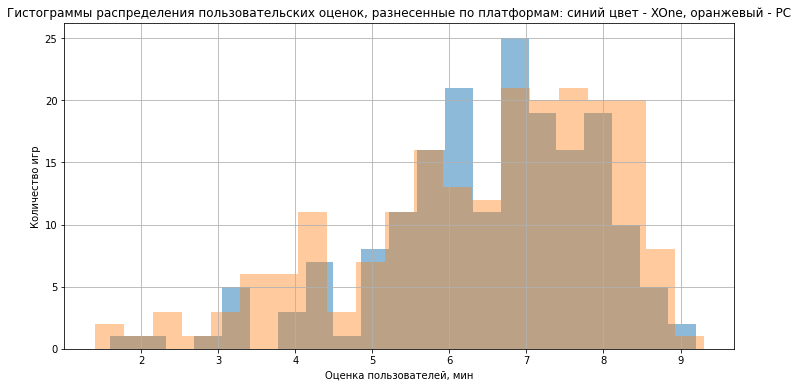

In [49]:
xone_score = games_actual.query('platform == "XOne"')['user_score']
pc_score = games_actual.query('platform == "PC"')['user_score']

(xone_score
 .plot(kind='hist'
       ,bins=21
       ,title='Гистограммы распределения пользовательских оценок, разнесенные по платформам: синий цвет - XOne, оранжевый - PC'
       ,grid=True
       ,figsize=(12,6)
       ,fontsize=10
       ,alpha=0.5
      )
)
(pc_score
 .plot(kind='hist'
       ,bins=21
       ,grid=True
       ,figsize=(12,6)
       ,fontsize=10
       ,alpha=0.4
      )
)
plt.xlabel('Оценка пользователей, мин')
plt.ylabel('Количество игр')
plt.show()

Получим сводку стат. данных по обеим группам:

In [50]:
print('Статистика по пользовательскому рейтингу игр платформы XOne:\n',
      xone_score.describe()
     )
print('\nСтатистика по пользовательскому рейтингу игр платформы PC:\n',
      pc_score.describe()
     )

Статистика по пользовательскому рейтингу игр платформы XOne:
 count    182.000000
mean       6.521429
std        1.380941
min        1.600000
25%        5.800000
50%        6.800000
75%        7.500000
max        9.200000
Name: user_score, dtype: float64

Статистика по пользовательскому рейтингу игр платформы PC:
 count    206.000000
mean       6.428641
std        1.664465
min        1.400000
25%        5.500000
50%        6.800000
75%        7.700000
max        9.300000
Name: user_score, dtype: float64


Проведем проверку гипотезы о равенстве средних пользовательских рейтингов игр обеих платформ при помощи встроенного метода ttest. 

Выборки независимы, уровень значимости alpha зададим 0.05. 

Нулевой гипотезой будет гипотеза о равенстве среднего двух выборок, альтернативной - что средняя пользовательскаz оценка игр платформы PC больше или меньше, чем платформы XOne.

In [51]:
alpha = 0.05
results = st.ttest_ind(games_actual.query('platform == "XOne" and user_score.notna()')['user_score']
                       ,games_actual.query('platform == "PC" and user_score.notna()')['user_score']
                       ,equal_var=False
                       ,alternative='two-sided'
                      )
print('p-значение:', results.pvalue)
if results.pvalue < alpha: 
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.5489537965134912
Не получилось отвергнуть нулевую гипотезу


Полученное значение p-value не опровергает предложенную гипотезу. С вероятностью 54.8% мы получим такое же или более далекое среднее, при условии, что нулевая гипотеза верна.

#### Проверка гипотезы о том, что средние пользовательские рейтинги жанров Action и Sports разные

Выведем на экран гистограммы распределений пользовательских оценок жанров Action и Sports:

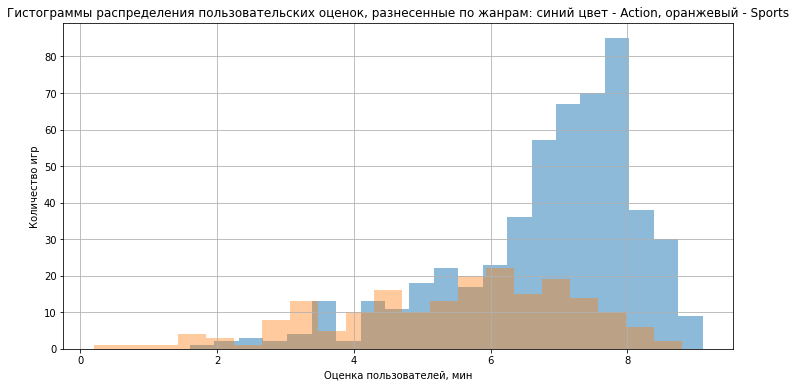

In [52]:
action_score = games_actual.query('genre == "Action"')['user_score']
sports_score = games_actual.query('genre == "Sports"')['user_score']

(action_score
 .plot(kind='hist'
       ,bins=21
       ,title='Гистограммы распределения пользовательских оценок, разнесенные по жанрам: синий цвет - Action, оранжевый - Sports'
       ,grid=True
       ,figsize=(12,6)
       ,fontsize=10
       ,alpha=0.5
      )
)
(sports_score
 .plot(kind='hist'
       ,bins=21
       ,grid=True
       ,figsize=(12,6)
       ,fontsize=10
       ,alpha=0.4
      )
)
plt.xlabel('Оценка пользователей, мин')
plt.ylabel('Количество игр')
plt.show()

Получим сводку стат. данных по обеим группам:

In [53]:
print('Статистика по пользовательскому рейтингу игр жанра Action:\n',
      action_score.describe()
     )
print('\nСтатистика по пользовательскому рейтингу игр жанра Sports:\n',
      sports_score.describe()
     )

Статистика по пользовательскому рейтингу игр жанра Action:
 count    523.000000
mean       6.825048
std        1.374440
min        1.600000
25%        6.250000
50%        7.100000
75%        7.800000
max        9.100000
Name: user_score, dtype: float64

Статистика по пользовательскому рейтингу игр жанра Sports:
 count    194.000000
mean       5.455670
std        1.743142
min        0.200000
25%        4.300000
50%        5.750000
75%        6.800000
max        8.800000
Name: user_score, dtype: float64


Проведем проверку гипотезы о неравенстве средних пользовательских рейтингов игр двух жанров при помощи встроенного метода ttest. 

Выборки независимы, уровень значимости alpha зададим 0.05. 

Нулевой гипотезой будет гипотеза о равенстве среднего двух выборок, альтернативной - что средняя пользовательская оценка игр жанра Action больше или меньше, чем жанра Sports.

In [54]:
alpha = 0.05
results = st.ttest_ind(games_actual.query('genre == "Action" and user_score.notna()')['user_score']
                       ,games_actual.query('genre == "Sports" and user_score.notna()')['user_score']
                       ,equal_var=False
                       ,alternative='two-sided'
                      )
print('p-значение:', results.pvalue)
if results.pvalue < alpha: 
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 5.989458066467418e-20
Отвергаем нулевую гипотезу


Данные противоречат нашей нулевой гипотезе, мы отвергаем ее в пользу альтернативной: "Средние пользовательские оценки игр в жанре Action и Sports - разные".

<a id='summary'></a>
### Выводы:  
[к заголовку](#start)

В данном проекте проводился анализ таблицы с информацией о компьтерных играх, помимо названия игры содержащей сведения о годе выпуска, игровой платформе, продажах в разных регионах мира, оценках критиков и пользователей, а также возрастном рейтинге.

Целью работы было выявление закономерностей игровой индустрии на момент конца 2016 года для того, чтобы интернет-магазин "Стримчик" в 2017 году мог правильно спланировать рекламные кампании и сдделать ставку на потенциально успешный продукт.

Исходный датасет содержал сведения о более чем 16 тысячах игр, начиная с 1980 года. На этапе предобработки были исправлены стилистические ошибки в названии столбцов, преобразованы типы данных, устранены дубликаты и обработаны пропущенные значения в нескольких столбцах.

По выполненным действиям на этапе исследовательского анализа были получены следующие результаты:
- За последние пять лет количество выпускаемых игр стабилизировалось на уровне примерно 600 в год. Это половина от уровня выпуска во время бума 2006-2011 годов. Тенденции к увеличению количества выпускаемых игр могут появиться с приходом на рынок новых технических решений для игровых консолей.

- Сравнение продаж по игровым плоатформам в зависимости от года выпуска игры позволило найти период жизни игровых платформ, длящийся в разных случаях от 8 до 12 лет.

- На основе полученного периода жизни игровых платформ мы определили актуальный период времени, анализ данных по которому будет наиболее соответствовать задачам проекта - найти закономерности и определить критерии успешности компьютерной игры в 2017 году. Период выбран с 2012 по 2016 годы - пять лет.

- Для полученного актуального периода мы нашли потенциально прибыльные платформы, сопоставив суммарные продажи. Этими платформами оказались PlayStation 4, Xbox One и PC.

- Далее, мы выполнили визуализацию вида "ящик с усами" распределений суммарных продаж для каждой из платформ на совместном графике, чтобы сравнение было наглядным. Здесь мы еще раз убедились в перспективности выбранных платформ, которые, находясь на пике своего периода жизни, еще полностью не реализовав свой потенциал, показывали наиболее вероятный уровень выручки по игре сравнимый с популярными, но в прошлом, платформами. 

- Проверив корреляцию отзывов пользователей и критиков на продажи той или иной игры, мы выяснили, что отзывы пользователей почти не влияют на продажи, причем корреляция даже уходит в небольшой минус, исключение - платформа WiiU. Зато оценки критиков влияют на продажи существенно. Например, для платформы PS4, ни одна игра с оценкой ниже 70 не заработала больше 2 млн., а вот игры с оценкой больше 90 все зарабатывали больше 2 млн.

- Исследование продаж по игровым жанрам показало, что основную долю продаж занимают игры Action, но, в основном, из-за своей массовости - их много, поэтому общие продажи большие. Средний же и медианный показатели выручки максимальны у жанра Shooter - 1.3 млн. и 0.48 млн. соответственно. Что почти в два раза больше двух самых прибыльного из остальных жанров - Sports и Platform.

На следующем этапе проекта были получены портреты типичного геймера для каждого из трех регионов - Североамериканского, Европейского и Японии. Портреты выглядят так:
- Северная Америка:

Человек старше 17 лет, играющий в игру в жанре Action на игровой консоли Xbox360 от фирмы Microsoft (США);

- Европа:

Человек старше 17 лет, играющий в игру в жанре Action на игровой консоли PS4 от фирмы Sony (Япония);

- Япония:

Ребенок или тинейджер, играющий в ролевую игру на портативной игровой консоли 3DS от фирмы Nintendo (Япония). 

Более подробный анализ, психологический и поведенческий, пользователя каждого региона помог бы более точно сформулировать его предпочтения в играх и помочь "Стримчику" найти правильную стратегию в 2017 году.

В статистической части проекта проверялись гипотезы касающиеся средних пользовательских рейтингов (оценок) по жанрам и платформам.
- Гипотеза о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые не была опровергнута с большой вероятностью;
- Гипотеза о том, что средние пользовательские рейтинги жанров Action и Sports разные не была опровергнута, т.е. была опровергнута обратная ей гипотеза о равенстве средних оценок в этих жанрах.

Итого. По результатам проведенного анализа мы делаем следующие рекомендации для интернет-магазина "Стримчик" на 2017 год:

- Вероятнее всего в Североамериканском и Европейском регионах прибыльными окажутся рекламные кампании игр жанра Shooter с рейтингом ESRB "M" для игровых платформ XBox One и PlayStation4, имеющие оценку критиками больше 90;
- В Японии рекламу следует давать ролевым играм для PlayStation4 также с рейтингом "М" и оценкой от критиков больше 90.